# Playground

This is a safe space to conduct experiments and even fail. Success will eventually come!

In [38]:
# Imports.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from utils import generate_random_floats

## Curve Fitting

In [21]:
def create_interpolation_function(x_points, y_points):
    ''' Function that creates a function that interpolates
        values between given x and y points. This new interpolation
        function is returned such that given any new x axis value,
        corresponding y axis value on the curve as per fitted data
        is returned.
    '''
    # Check if the number of x and y points match.
    if len(x_points) != len(y_points):
        raise ValueError("Number of x and y points must be the same.")
    
    # Create the interpolation function.
    interpolation_function = interp1d(
        x_points, y_points, 
        kind='linear', fill_value="extrapolate"
    )

    # Define a new function that takes an x value 
    # and returns the interpolated y value.
    def interpolated_function(x):
        return float(interpolation_function(x))

    return interpolated_function

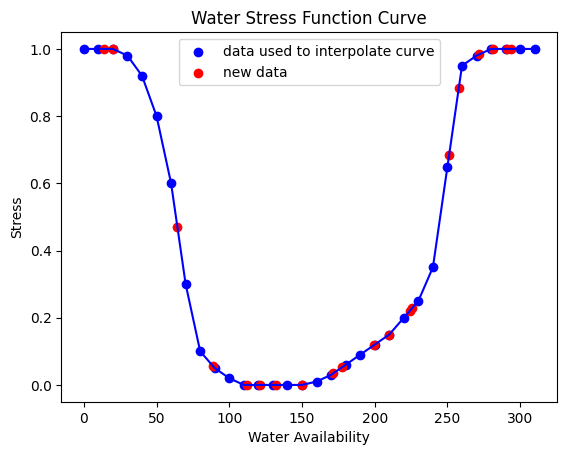

In [66]:
df_water_stress = pd.read_csv('./data/water_stress.csv')
curve_fn_water_stress = create_interpolation_function(
    df_water_stress.water_availability, 
    df_water_stress.stress
)
plt.scatter(
    df_water_stress['water_availability'], 
    df_water_stress['stress'],
    color='blue', label='data used to interpolate curve'
)
plt.plot(
    df_water_stress['water_availability'], 
    df_water_stress['stress'],
    color='blue'
)
new_points = sorted(generate_random_floats(20, 0, 320))
plt.scatter(
    new_points, [curve_fn_water_stress(x) for x in new_points],
    color='red', label='new data'
)
plt.xlabel('Water Availability')
plt.ylabel('Stress')
plt.title('Water Stress Function Curve')
plt.legend()
plt.savefig('./figures/water_stress_curve.png')
plt.show()

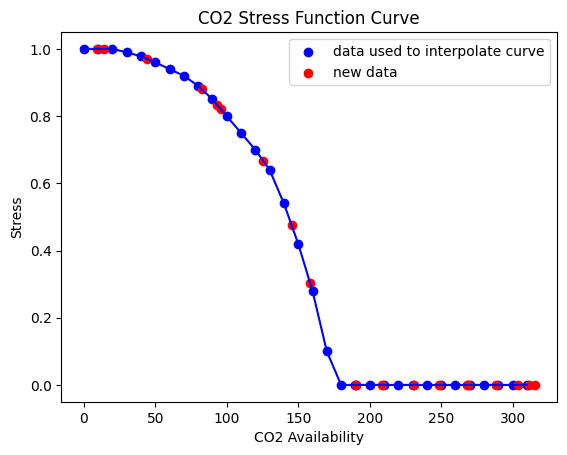

In [93]:
df_co2_stress = pd.read_csv('./data/co2_stress.csv')
curve_fn_co2_stress = create_interpolation_function(
    df_co2_stress.co2_availability, 
    df_co2_stress.stress
)
plt.scatter(
    df_co2_stress['co2_availability'], 
    df_co2_stress['stress'],
    color='blue', label='data used to interpolate curve'
)
plt.plot(
    df_co2_stress['co2_availability'], 
    df_co2_stress['stress'],
    color='blue'
)
new_points = sorted(generate_random_floats(20, 0, 320))
plt.scatter(
    new_points, [curve_fn_co2_stress(x) for x in new_points],
    color='red', label='new data'
)
plt.xlabel('CO2 Availability')
plt.ylabel('Stress')
plt.title('CO2 Stress Function Curve')
plt.legend()
plt.savefig('./figures/co2_stress_curve.png')
plt.show()

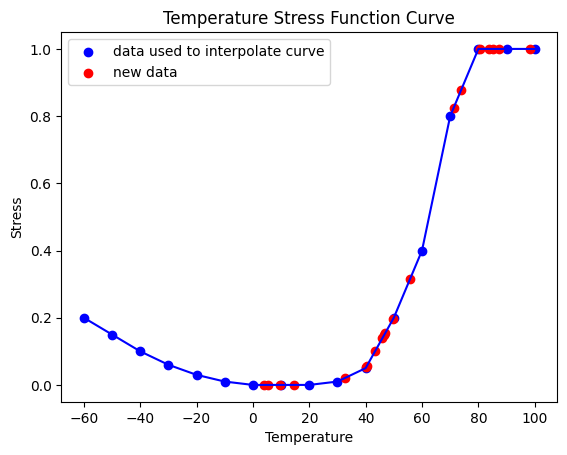

In [114]:
df_temp_stress = pd.read_csv('./data/temp_stress.csv')
curve_fn_temp_stress = create_interpolation_function(
    df_temp_stress.temperature, 
    df_temp_stress.stress
)
plt.scatter(
    df_temp_stress['temperature'], 
    df_temp_stress['stress'],
    color='blue', label='data used to interpolate curve'
)
plt.plot(
    df_temp_stress['temperature'], 
    df_temp_stress['stress'],
    color='blue'
)
new_points = sorted(generate_random_floats(20, 0, 100))
plt.scatter(
    new_points, [curve_fn_temp_stress(x) for x in new_points],
    color='red', label='new data'
)
plt.xlabel('Temperature')
plt.ylabel('Stress')
plt.title('Temperature Stress Function Curve')
plt.legend()
plt.savefig('./figures/temp_stress_curve.png')
plt.show()